In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
songs = pd.read_csv('../data/raw/spotify-2023.csv', encoding='ISO-8859-1')
# Prints the first 5 rows
print(songs.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
# Prints data types of each column
print(songs.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [4]:
# Checks for missing values 
print('Missing Values \n',songs.isnull().sum())

Missing Values 
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [5]:
#Data Imputation

# Convert from Object to Int 
songs['streams'] = pd.to_numeric(songs['streams'], errors='coerce').fillna(0).astype('int64') #empty or non numerical values are filled in as 0
songs['in_deezer_playlists'] = pd.to_numeric(songs['in_deezer_playlists'], errors='coerce')
songs['in_shazam_charts'] = pd.to_numeric(songs['in_shazam_charts'], errors='coerce')

# Impute 'in_shazam_charts' empty values with median
songs['in_shazam_charts'].fillna(songs['in_shazam_charts'].median(), inplace=True)

# Impute 'key' with the most frequent key
most_frequent_key = songs['key'].mode()[0]  # get the most frequent value
songs['key'].fillna(most_frequent_key, inplace=True)

# Prints data types of each column
print(songs.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


C:\Users\kenne\AppData\Local\Temp\ipykernel_23260\1618930214.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs['in_shazam_charts'].fillna(songs['in_shazam_charts'].median(), inplace=True)
C:\Users\kenne\AppData\Local\Temp\ipykernel_23260\1618930214.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [6]:
# Checks the number of 0's for numerical values
numerical_columns = songs.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
zeros_count = (songs[numerical_columns] == 0).sum()  # Count zeros in numerical columns
print('\nZero Values in Numerical Columns:\n', zeros_count)


Zero Values in Numerical Columns:
 artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts       405
streams                   1
in_apple_playlists       23
in_apple_charts         100
in_deezer_playlists      24
in_deezer_charts        558
in_shazam_charts        344
bpm                       0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%           60
instrumentalness_%      866
liveness_%                0
speechiness_%             0
dtype: int64


In [7]:
# Drop row that contains song with 0 streams
songs.drop(songs[songs['streams'] == 0].index, inplace=True)

# Check if it was dropped
numerical_columns = songs.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
zeros_count = (songs[numerical_columns] == 0).sum()  # Count zeros in numerical columns
print('\nZero Values in Numerical Columns:\n', zeros_count)



Zero Values in Numerical Columns:
 artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts       404
streams                   0
in_apple_playlists       23
in_apple_charts          99
in_deezer_playlists      24
in_deezer_charts        557
in_shazam_charts        343
bpm                       0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%           60
instrumentalness_%      865
liveness_%                0
speechiness_%             0
dtype: int64


In [8]:
# Check for duplicates
print('Duplicates Found: ', songs.duplicated().sum())

Duplicates Found:  0


In [9]:
# Features exempt from Outlier Detection
# artist_count
# released_month
# released_day
# released_year 



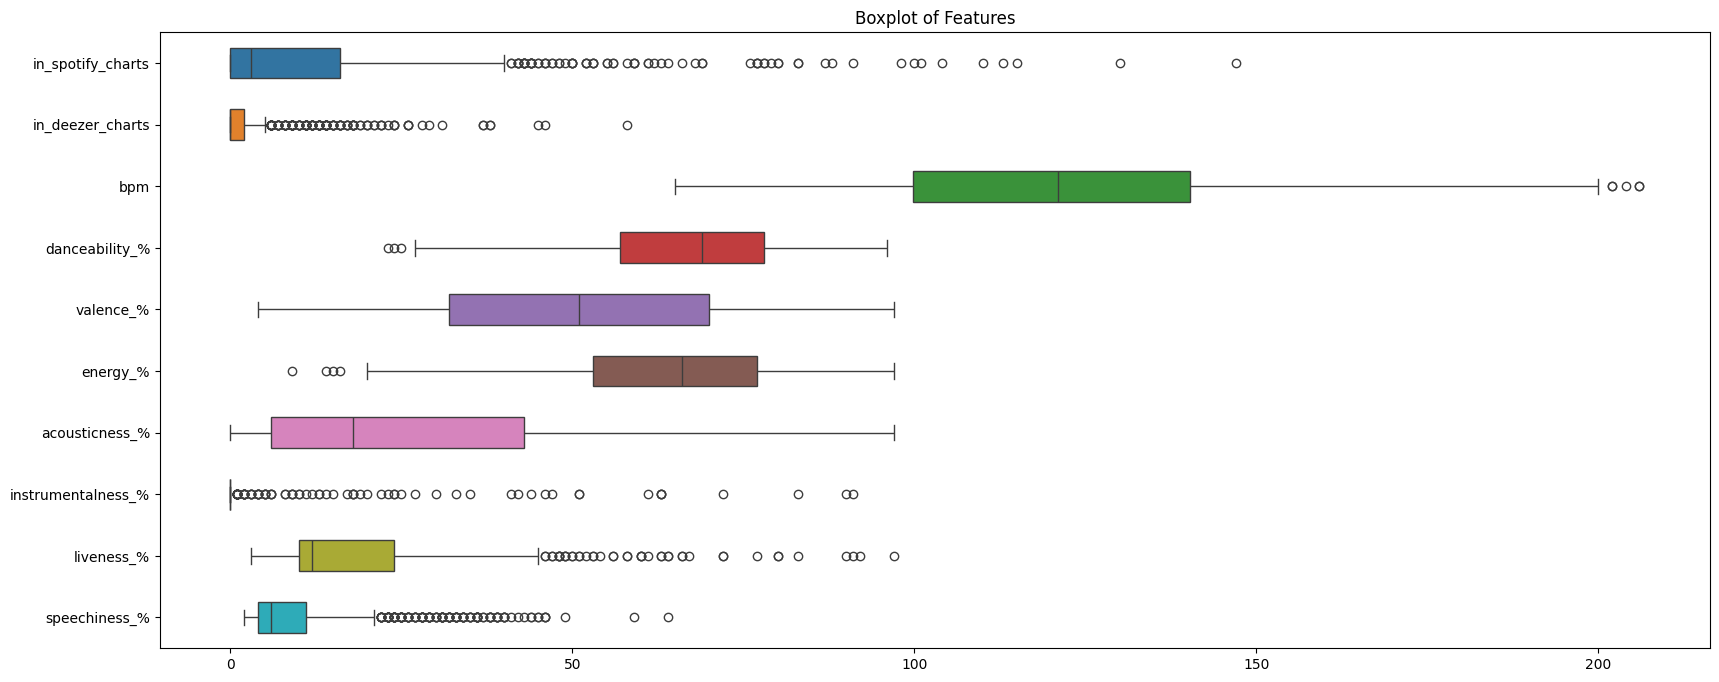

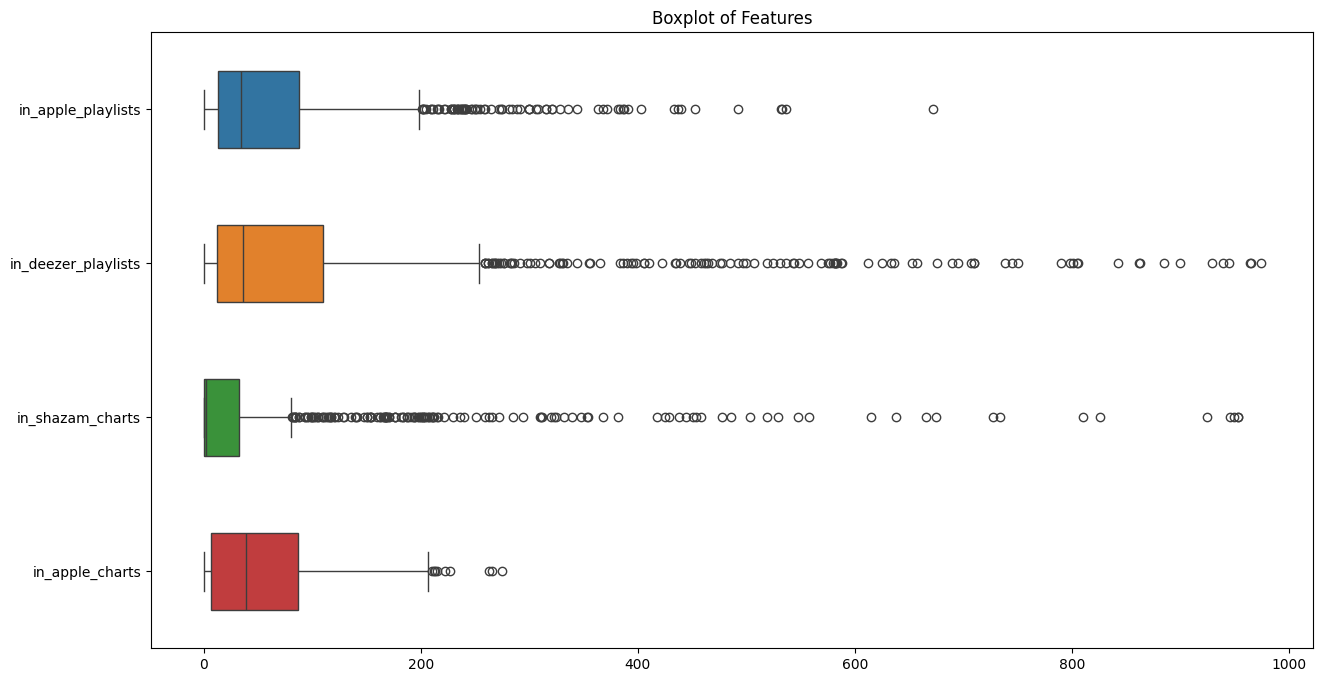

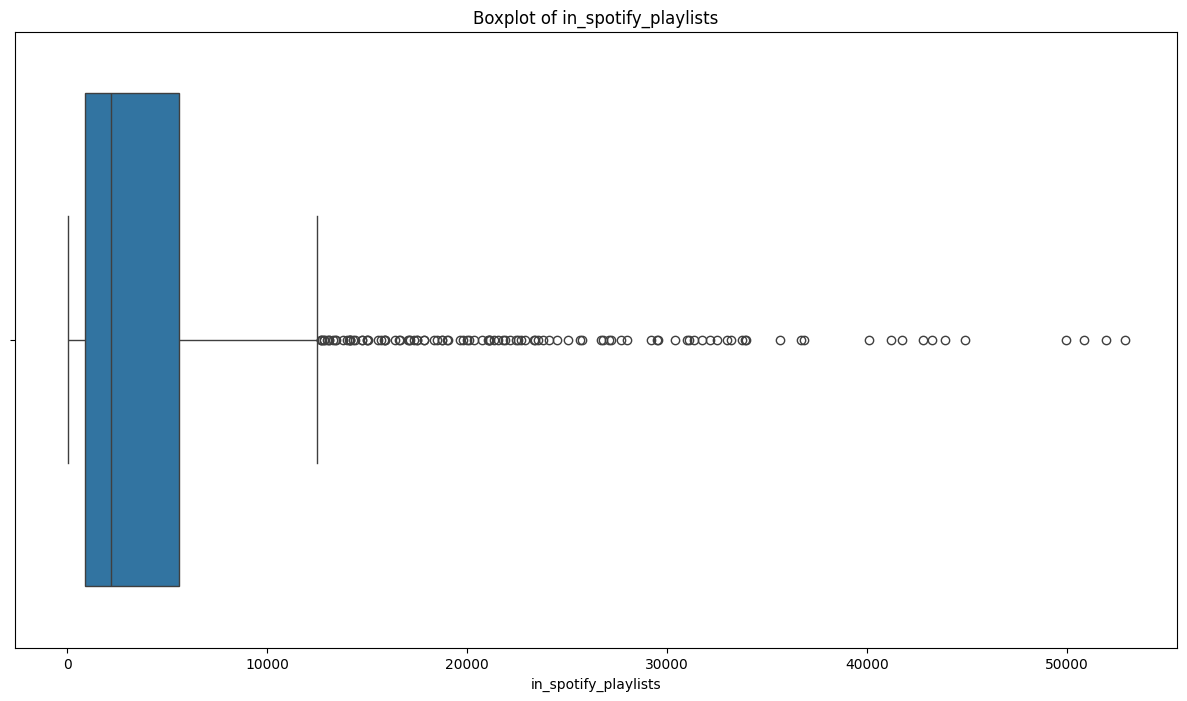

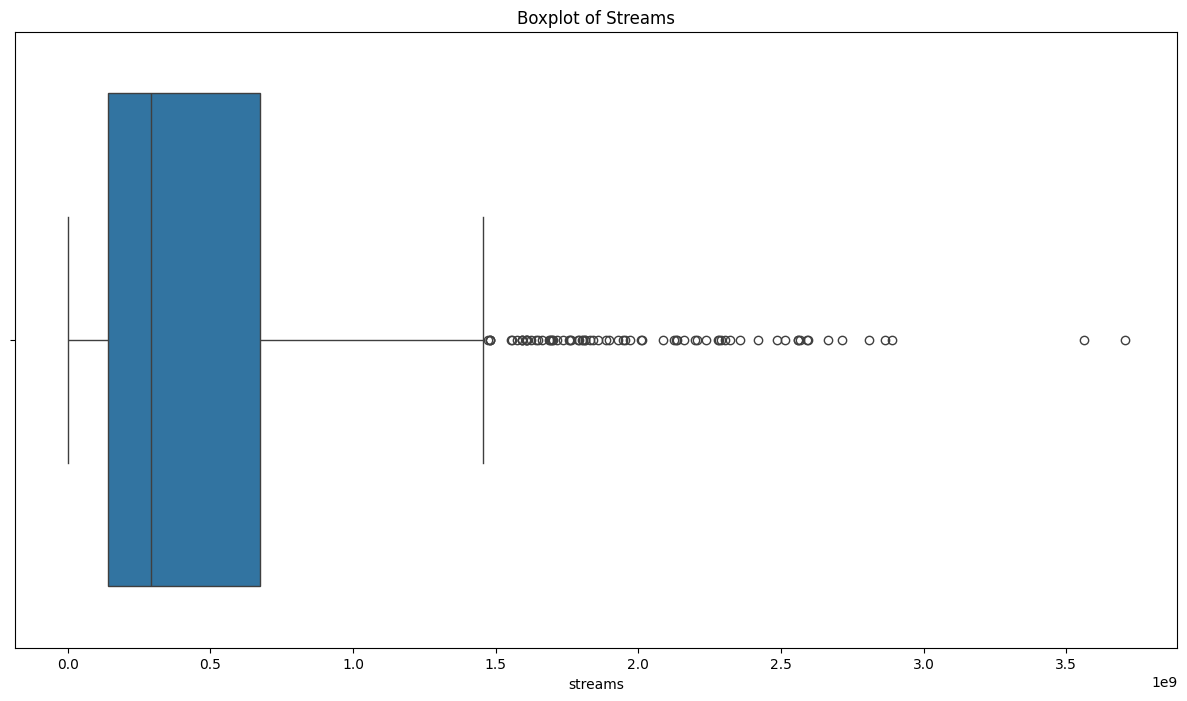

In [10]:
# Boxplot to detect outliers
plt.figure(figsize=(20, 8))
songs_without_column = songs.drop(columns=['artist_count','released_month','released_day','released_year','streams', 'in_spotify_playlists','in_shazam_charts','in_apple_charts','in_apple_playlists', 'in_deezer_playlists'])
sns.boxplot(data=songs_without_column, orient="h", width=0.5)
plt.title('Boxplot of Features')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(15, 8))
columns = ['in_apple_playlists', 'in_deezer_playlists','in_shazam_charts','in_apple_charts']
sns.boxplot(data=songs[columns], orient="h", width=0.5)
plt.title('Boxplot of Features')
plt.show()

# Boxplot for in_spotify_playlists
plt.figure(figsize=(15, 8))
sns.boxplot(x=songs['in_spotify_playlists'])
plt.title('Boxplot of in_spotify_playlists')
plt.show()

# Boxplot for streams
plt.figure(figsize=(15, 8))
sns.boxplot(x=songs['streams'])
plt.title('Boxplot of Streams')
plt.show()

In [11]:
# Transform with Logs 
columns_to_transform = ['streams', 'in_spotify_playlists']
songs[columns_to_transform] = songs[columns_to_transform].apply(np.log1p)

# Remove Outliers
columns_to_include = ['in_shazam_charts','in_apple_charts', 'in_deezer_charts', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'danceability_%', 'energy_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','acousticness_%']
Q1 = songs[columns_to_include].quantile(0.25)
Q3 = songs[columns_to_include].quantile(0.75)
IQR = Q3 - Q1
songs = songs[~((songs[columns_to_include] < (Q1 - 1.5 * IQR)) | (songs[columns_to_include] > (Q3 + 1.5 * IQR))).any(axis=1)]

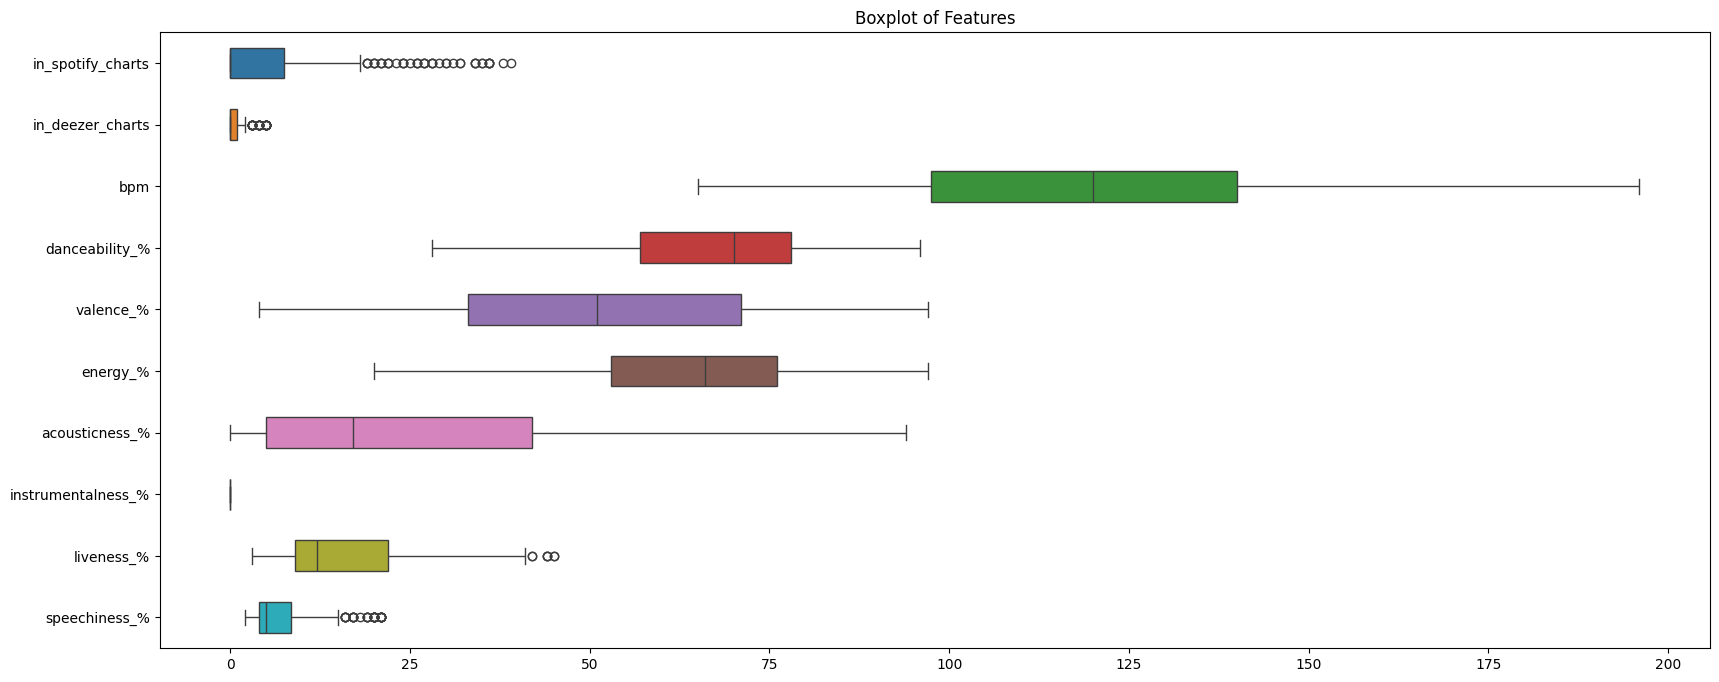

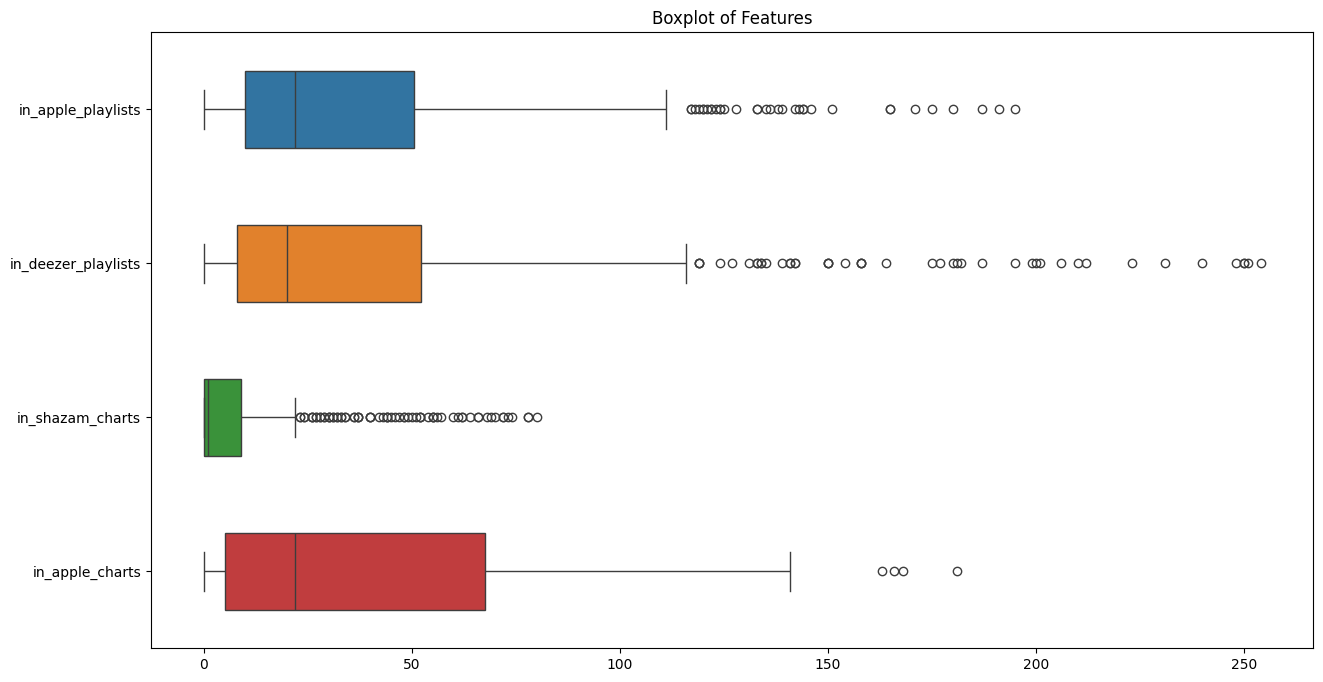

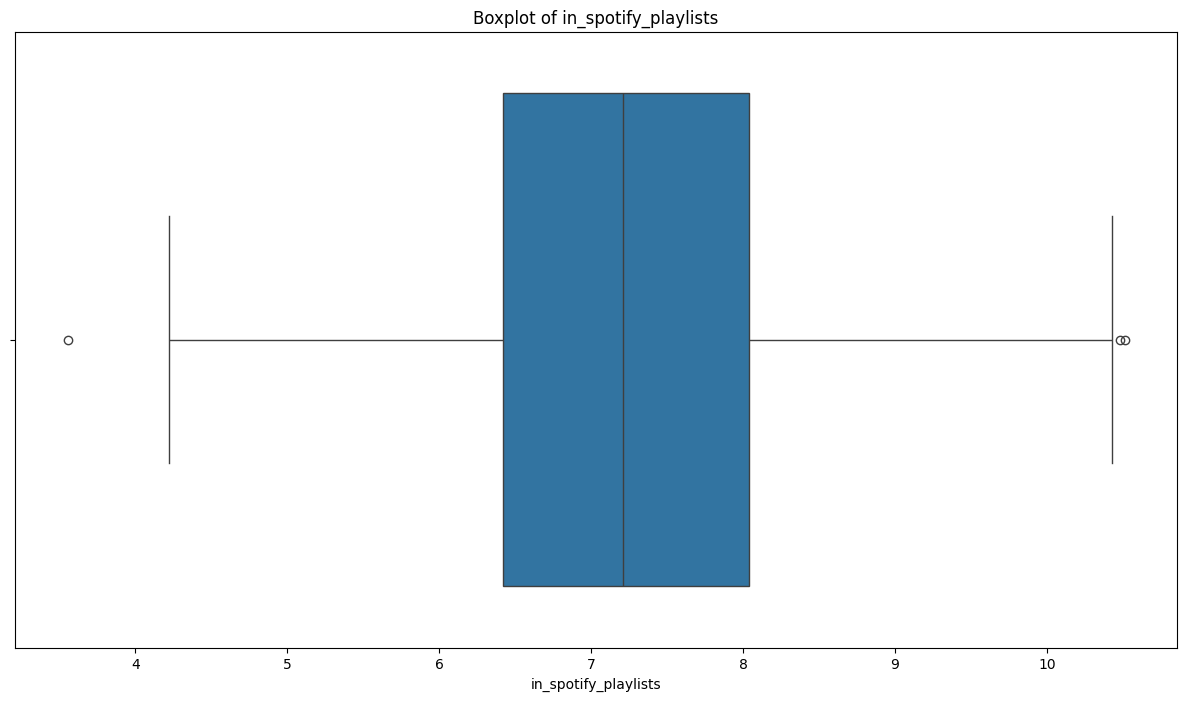

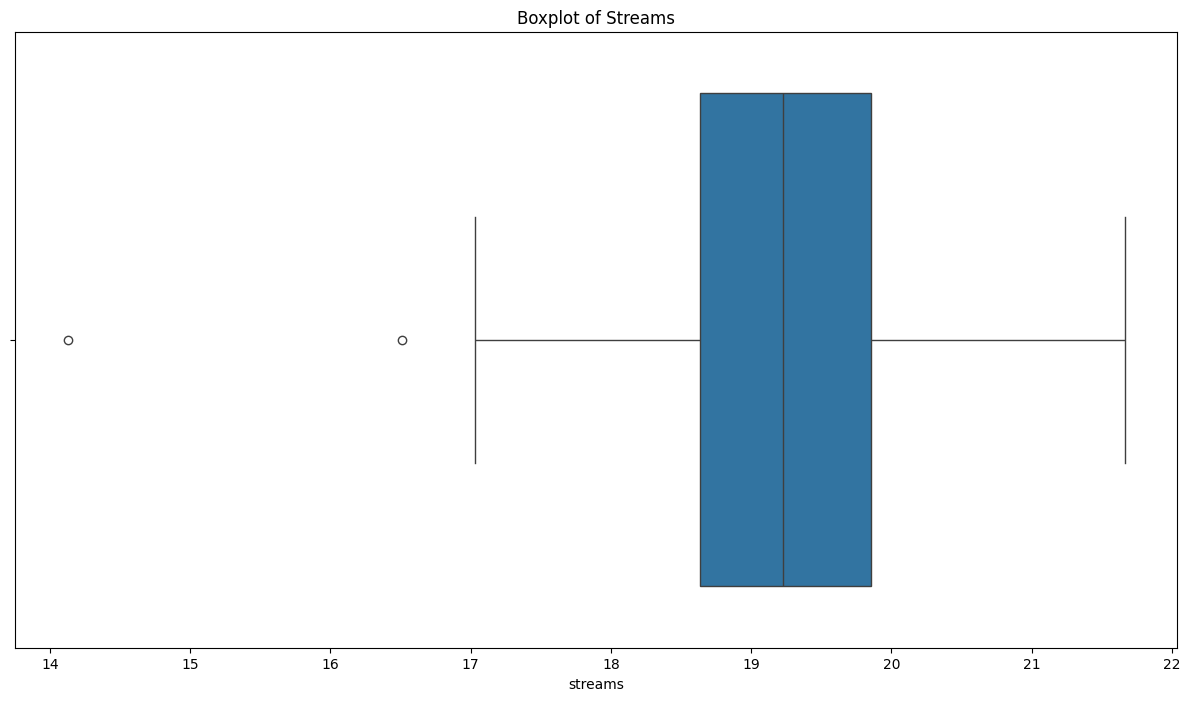

In [12]:
# Boxplot to see outliers removed (small scale)
plt.figure(figsize=(20, 8))
songs_without_column = songs.drop(columns=['artist_count','released_month','released_day','released_year','streams', 'in_spotify_playlists','in_shazam_charts','in_apple_charts','in_apple_playlists', 'in_deezer_playlists'])
sns.boxplot(data=songs_without_column, orient="h", width=0.5)
plt.title('Boxplot of Features')
plt.show()

# Boxplot to see outliers removed (large scale)
plt.figure(figsize=(15, 8))
columns = ['in_apple_playlists', 'in_deezer_playlists','in_shazam_charts','in_apple_charts']
sns.boxplot(data=songs[columns], orient="h", width=0.5)
plt.title('Boxplot of Features')
plt.show()

# Boxplot to see in_spotify_playlists transformed
plt.show()
plt.figure(figsize=(15, 8))
sns.boxplot(x=songs['in_spotify_playlists'])
plt.title('Boxplot of in_spotify_playlists')
plt.show()

# Boxplot to see streams transformed
plt.figure(figsize=(15, 8))
sns.boxplot(x=songs['streams'])
plt.title('Boxplot of Streams')
plt.show()


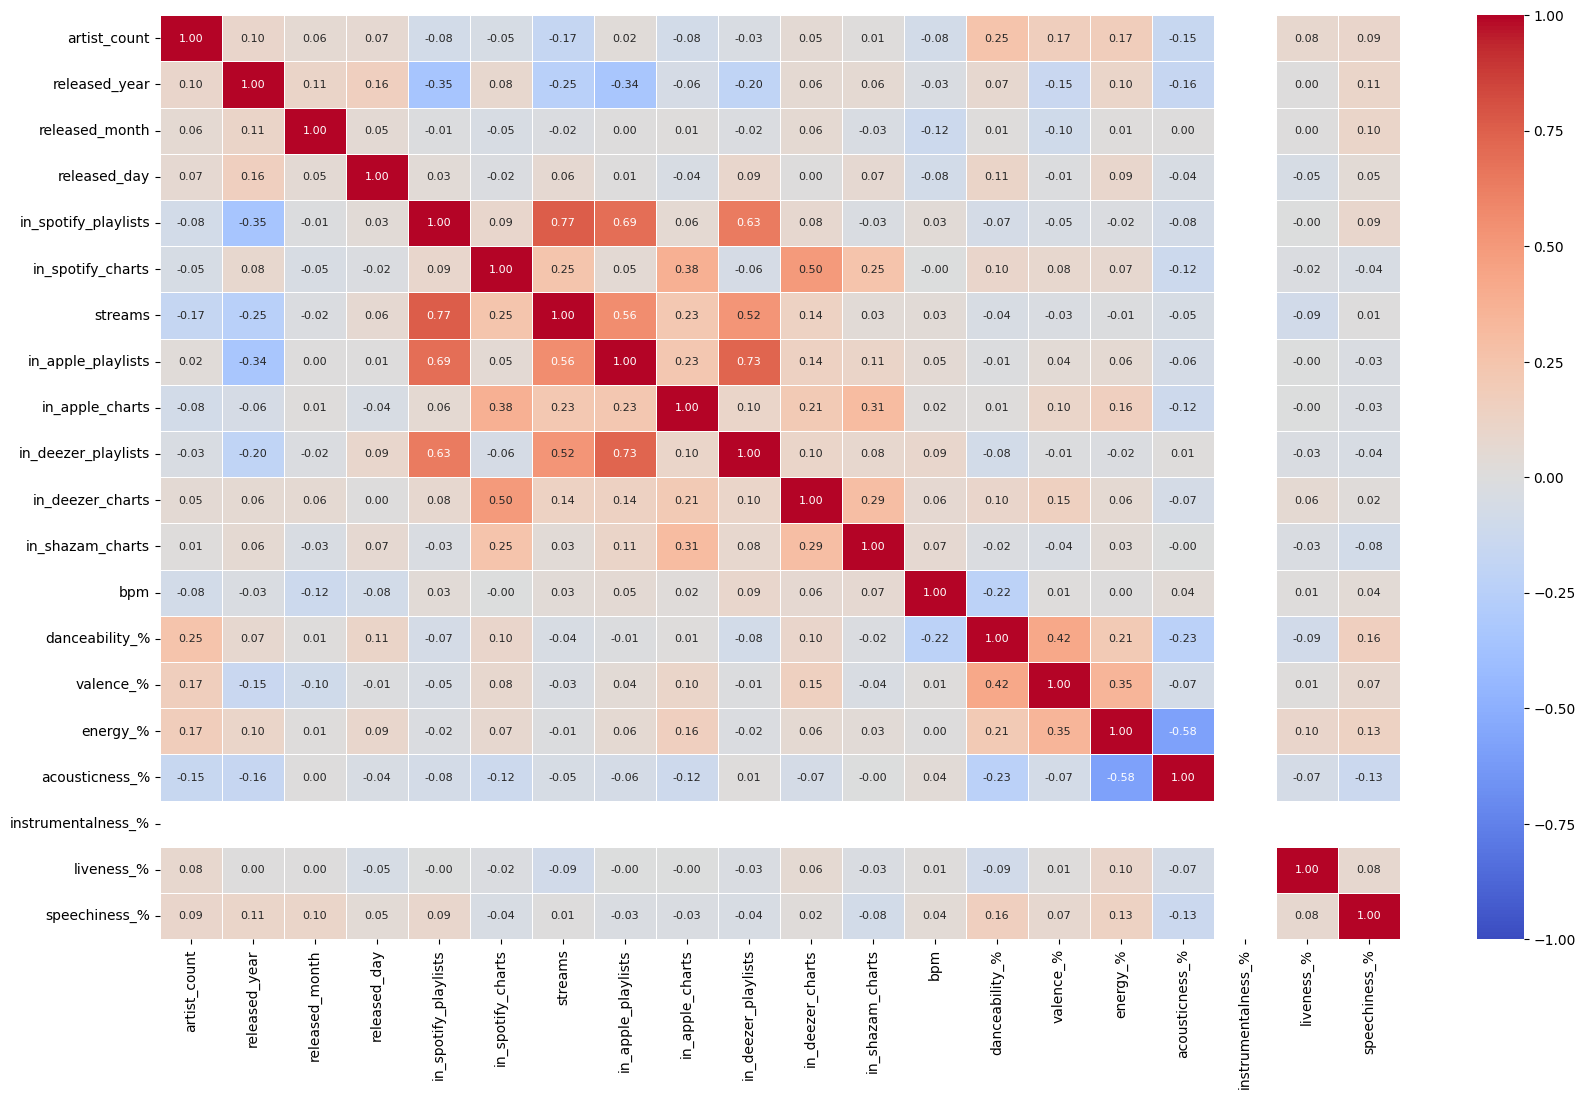

in_spotify_playlists  streams                 0.765358
streams               in_spotify_playlists    0.765358
in_apple_playlists    in_deezer_playlists     0.732955
in_deezer_playlists   in_apple_playlists      0.732955
in_spotify_playlists  in_apple_playlists      0.688329
in_apple_playlists    in_spotify_playlists    0.688329
in_spotify_playlists  in_deezer_playlists     0.633575
in_deezer_playlists   in_spotify_playlists    0.633575
energy_%              acousticness_%         -0.582937
acousticness_%        energy_%               -0.582937
dtype: float64


In [13]:
# Correlation Calculations

# Get Numeric Values
songs_numeric_columns = songs.select_dtypes(include=[np.number])

# Compute the Correlation Matrix
corr_matrix = songs_numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Prints Top 10 strongest correlations
corr_pairs = corr_matrix.unstack()
sorted_corr = corr_pairs.sort_values(key=abs, ascending=False)
# Drop self-correlations by filtering out correlations of 1
sorted_corr = sorted_corr[sorted_corr != 1]
print(sorted_corr.head(10))  

In [14]:
# Encoding

#Binary Encoding
songs['mode'] = songs['mode'].map({'Major': 1, 'Minor': 0})

# One Hot Encoding
songs = pd.get_dummies(songs, columns=['key'])

#Label Encoding
le = LabelEncoder()
songs['track_name'] = le.fit_transform(songs['track_name'])
songs['artist(s)_name'] = le.fit_transform(songs['artist(s)_name'])

print(songs.head())

    track_name  artist(s)_name  artist_count  released_year  released_month  \
20         180             108             3           2023               6   
40         103             142             2           2023               2   
62         192              49             3           2022               6   
68         264             228             1           2023               7   
69         110             279             1           2023               7   

    released_day  in_spotify_playlists  in_spotify_charts    streams  \
20            22              5.808142                 26  18.275017   
40            10              6.541030                 25  19.686206   
62            24              8.041735                 39  20.395365   
68            14              6.018593                 36  16.508814   
69             7              5.003946                 24  17.493788   

    in_apple_playlists  ...  key_A#  key_B  key_C#  key_D  key_D#  key_E  \
20              

In [15]:
# Normalization of Data

# Initialize the scaler
scaler = MinMaxScaler()
columns_to_normalize = ['streams', 'in_spotify_playlists','in_shazam_charts','in_apple_charts', 'in_deezer_charts', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'danceability_%', 'energy_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','acousticness_%']
# Fit and transform the selected columns
songs_normalized = scaler.fit_transform(songs[columns_to_normalize])

print(songs[columns_to_normalize].describe())



          streams  in_spotify_playlists  in_shazam_charts  in_apple_charts  \
count  431.000000            431.000000        431.000000       431.000000   
mean    19.238259              7.249702          9.740139        38.176334   
std      0.962121              1.231817         17.905495        39.951150   
min     14.126801              3.555348          0.000000         0.000000   
25%     18.635303              6.423247          0.000000         5.000000   
50%     19.225291              7.209340          1.000000        22.000000   
75%     19.853807              8.042699          9.000000        67.500000   
max     21.663089             10.511213         80.000000       181.000000   

       in_deezer_charts  in_spotify_charts  in_apple_playlists  \
count        431.000000         431.000000          431.000000   
mean           0.510441           5.568445           37.192575   
std            1.084460           8.756623           40.276342   
min            0.000000          

In [16]:
print(songs_normalized.describe())

AttributeError: 'numpy.ndarray' object has no attribute 'describe'